In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
!wget $data -O churn_data.csv

--2024-07-11 15:33:16--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘churn_data.csv’

churn_data.csv      100%[===================>] 954.59K  --.-KB/s    in 0.05s   

2024-07-11 15:33:17 (20.5 MB/s) - ‘churn_data.csv’ saved [977501/977501]



In [ ]:
df = pd.read_csv('churn_data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df1 = df.copy()
df1.columns = df1.columns.str.lower().str.replace(' ','_')

In [ ]:
categorical_cols = list(df1.dtypes[df1.dtypes == 'object'].index)

In [ ]:
for v in categorical_cols:
  df1[v] = df1[v].str.lower().str.replace(' ','_')

df1

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


In [ ]:
df1.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [ ]:
df2 = df1.copy()
df2.totalcharges = pd.to_numeric(df2.totalcharges, errors='coerce')

In [ ]:
df2.totalcharges = df2.totalcharges.fillna(0)

In [ ]:
df2['churn']

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [ ]:
df2.churn = (df2.churn != 'no').astype('int')

In [ ]:
df2.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set_full, test_set = train_test_split(df2, test_size=0.2, random_state=1, shuffle=True)

In [ ]:
train_set, val_set = train_test_split(df2, test_size=0.25, random_state=1, shuffle=True)

In [ ]:
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

In [ ]:
y_train = train_set.churn.values
y_val = val_set.churn.values
y_test = test_set.churn.values

In [ ]:
del train_set['churn']
del val_set['churn']
del test_set['churn']

In [ ]:
 train_set_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
global_churn_rate = train_set_full.churn.mean()
round(global_churn_rate,2)

0.27

In [ ]:
train_set_full.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [ ]:
numeric = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
train_set_full.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [ ]:
train_set_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [ ]:
churn_male = train_set_full[train_set_full.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [ ]:
churn_female = train_set_full[train_set_full.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [ ]:
train_set_full.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [ ]:
churn_partner = train_set_full[train_set_full.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [ ]:
churn_no_partner = train_set_full[train_set_full.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [ ]:
train_set_full.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [ ]:
for v in categorical:
  df_group = train_set_full.groupby(v).churn.agg(['mean', 'count'])
  df_group['diff'] = df_group['mean'] - global_churn_rate
  df_group['risk_ratio'] = df_group['mean']/global_churn_rate

  display(df_group)
  print()
  print()

,mean,count,diff,risk_ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk_ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk_ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk_ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk_ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk_ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk_ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk_ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk_ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk_ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk_ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk_ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk_ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk_ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk_ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
def mutual_info_churn_score(series):
  mutual_info_score(series, train_set_full.churn)

In [ ]:
train_set_full[categorical].apply(mutual_info_churn_score)

gender              None
seniorcitizen       None
partner             None
dependents          None
phoneservice        None
multiplelines       None
internetservice     None
onlinesecurity      None
onlinebackup        None
deviceprotection    None
techsupport         None
streamingtv         None
streamingmovies     None
contract            None
paperlessbilling    None
paymentmethod       None
dtype: object

In [ ]:
mutual_info_score(train_set_full.gender, train_set_full.churn)

0.0001174846211139946

In [ ]:
mi = train_set_full[categorical].apply(lambda x: mutual_info_score(x, train_set_full.churn))
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [ ]:
train_set_full[numeric].corrwith(train_set_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer(sparse=False)

In [ ]:
train_dicts = train_set[categorical + numeric].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = val_set[categorical + numeric].to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
df_result = pd.DataFrame()

In [ ]:
df_result['prediction'] = y_pred
df_result['actual'] = y_train
df_result['correct'] = y_pred == y_train

df_result

,prediction,actual,correct
0,0,0,True
1,0,1,False
2,0,0,True
3,0,0,True
4,1,1,True
...,...,...,...
5277,1,1,True
5278,0,0,True
5279,1,1,True
5280,0,1,False


In [ ]:
df_result['correct'].mean()

0.8027262400605831

In [ ]:
y_pred = model.predict_proba(X_train)
y_pred

array([[0.96865968, 0.03134032],
       [0.62064987, 0.37935013],
       [0.82717212, 0.17282788],
       ...,
       [0.36154938, 0.63845062],
       [0.50013981, 0.49986019],
       [0.93449998, 0.06550002]])

In [ ]:
decision = (y_pred[:,1] >= 0.5).astype(int)
decision.shape

(5282,)

In [ ]:
df_result2 = pd.DataFrame()
y_pred = model.predict_proba(X_val)
df_result2['probability'] = y_pred[:,1]
decision = (y_pred[:,1] >= 0.5).astype(int)
df_result2['prediction'] = decision
df_result2['actual'] = y_val
df_result2['correct'] = df_result2['prediction'] == y_val

df_result2

,probability,prediction,actual,correct
0,0.062259,0,0,True
1,0.175867,0,0,True
2,0.359349,0,0,True
3,0.505571,1,1,True
4,0.234147,0,0,True
...,...,...,...,...
1756,0.261297,0,1,False
1757,0.017242,0,0,True
1758,0.003137,0,0,True
1759,0.732196,1,1,True


In [ ]:
df_result2['correct'].mean()

0.8120386144236229

In [ ]:
model.coef_

array([[ 0.24587625, -0.14230557, -0.22474859,  0.03038708, -0.15156499,
         0.06612416, -0.0907338 , -0.09656827, -0.06638545, -0.05479246,
        -0.28777851,  0.2573344 , -0.0907338 ,  0.00397567, -0.23426344,
         0.03531205,  0.07777348,  0.08735635, -0.0907338 , -0.11780047,
         0.23939328, -0.0907338 , -0.26983739, -0.26060585,  0.13942794,
        -0.06744676, -0.05373115, -0.07818228, -0.10761832,  0.25506811,
        -0.19044542,  0.03531205, -0.15648996,  0.18918749, -0.09586569,
        -0.0907338 ,  0.06542158, -0.07330963, -0.0907338 ,  0.04286552,
         0.24492377, -0.0907338 , -0.27536788, -0.06819315,  0.00036047]])

In [ ]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [ ]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.246,
 'contract=one_year': -0.142,
 'contract=two_year': -0.225,
 'dependents=no': 0.03,
 'dependents=yes': -0.152,
 'deviceprotection=no': 0.066,
 'deviceprotection=no_internet_service': -0.091,
 'deviceprotection=yes': -0.097,
 'gender=female': -0.066,
 'gender=male': -0.055,
 'internetservice=dsl': -0.288,
 'internetservice=fiber_optic': 0.257,
 'internetservice=no': -0.091,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.234,
 'multiplelines=no_phone_service': 0.035,
 'multiplelines=yes': 0.078,
 'onlinebackup=no': 0.087,
 'onlinebackup=no_internet_service': -0.091,
 'onlinebackup=yes': -0.118,
 'onlinesecurity=no': 0.239,
 'onlinesecurity=no_internet_service': -0.091,
 'onlinesecurity=yes': -0.27,
 'paperlessbilling=no': -0.261,
 'paperlessbilling=yes': 0.139,
 'partner=no': -0.067,
 'partner=yes': -0.054,
 'paymentmethod=bank_transfer_(automatic)': -0.078,
 'paymentmethod=credit_card_(automatic)': -0.108,
 'paymentmethod=electronic_check': 0.255,
 

Using the Model

In [ ]:
dicts_full_train = train_set_full[categorical + numeric].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)

In [ ]:
X_full_train = dv.fit_transform(dicts_full_train)

In [ ]:
y_full_train = train_set_full.churn.values

In [ ]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [ ]:
dicts_test = test_set[categorical + numeric].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [ ]:
y_pred = model.predict_proba(X_test)

In [ ]:
churn_decision = (y_pred[:,1] >= 0.5).astype(int)

In [ ]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [ ]:
customer_data = dv.transform([customer])

In [ ]:
model.predict_proba(customer_data)[:,1]

array([0.4056811])

In [ ]:
y_test[10]

0

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
threshold = np.linspace(0, 1, 31)

In [ ]:
scores = []
for t in threshold:
  churn_decision = (y_pred[:,1] >= t).astype(int)
  acc = accuracy_score(y_test, churn_decision)
  print('%.2f %.3f' % (t, acc))
  scores.append(acc)

0.00 0.247
0.03 0.432
0.07 0.518
0.10 0.603
0.13 0.653
0.17 0.684
0.20 0.707
0.23 0.738
0.27 0.758
0.30 0.771
0.33 0.778
0.37 0.778
0.40 0.791
0.43 0.799
0.47 0.810
0.50 0.815
0.53 0.820
0.57 0.815
0.60 0.814
0.63 0.809
0.67 0.808
0.70 0.800
0.73 0.787
0.77 0.775
0.80 0.766
0.83 0.757
0.87 0.753
0.90 0.753
0.93 0.753
0.97 0.753
1.00 0.753


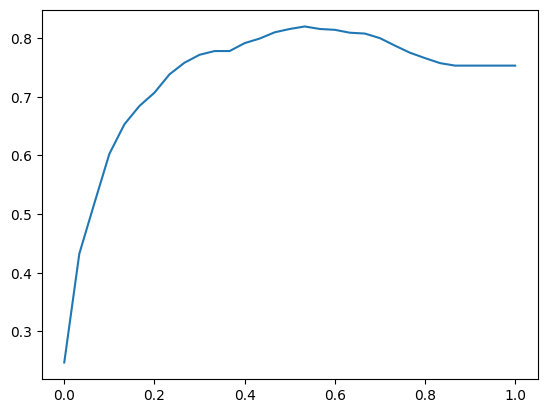

In [ ]:
import matplotlib.pyplot as plt
plt.plot(threshold, scores)

Saving the Model

In [ ]:
import pickle

In [ ]:
output_file = 'churn_model.bin'

In [ ]:
with open(output_file, 'wb') as f_out:
  pickle.dump((dv, model), f_out)

Loading the Model

In [ ]:
with open('churn_model.bin', 'rb') as f_in:
  dv, model = pickle.load(f_in)

In [ ]:
dv, model

(DictVectorizer(sparse=False), LogisticRegression())